<a href="https://colab.research.google.com/github/shobhitsundriyal/100daysofMLcode/blob/master/GHF_thon_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Training%20Data.csv
!wget https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Test%20Data.csv
!wget https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Sample%20Prediction%20Dataset.csv

In [2]:
import pandas as pd
train_df = pd.read_csv('/content/Training Data.csv')
test_df = pd.read_csv('/content/Test Data.csv')
sample_sub = pd.read_csv('/content/Sample Prediction Dataset.csv')

In [3]:
train_df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
test_df.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [20]:
labels = train_df.risk_flag
train_df.shape

(252000, 13)

## Univariate analysis

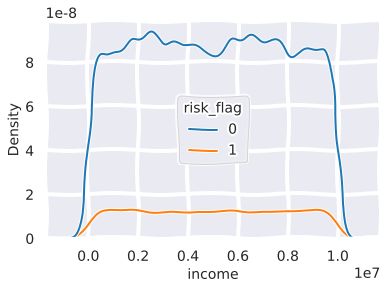

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.xkcd()
sns.set_style("darkgrid")
sns.kdeplot(train_df.income, hue=labels)

almost uniform distribution

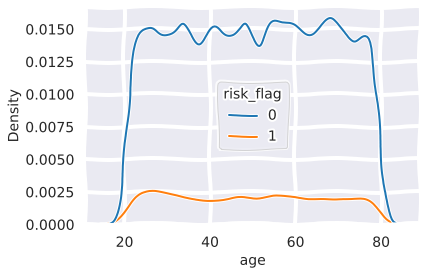

In [11]:
#Age
sns.kdeplot(train_df.age, hue=labels)

KeyboardInterrupt: ignored

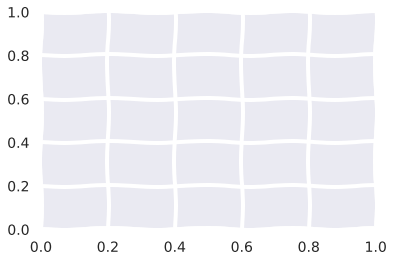

In [14]:
sns.kdeplot(x=train_df.income, y=train_df.age, )

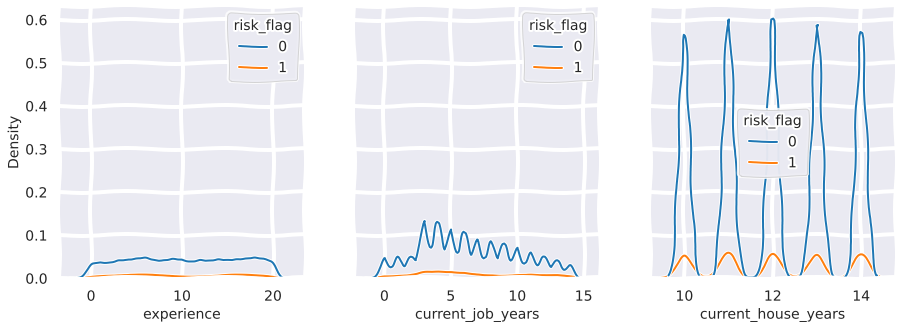

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.kdeplot(ax=axes[0], x=train_df.experience, hue=labels)
sns.kdeplot(ax=axes[1], x=train_df.current_job_years, hue=labels)
sns.kdeplot(ax=axes[2], x=train_df.current_house_years, hue=labels)

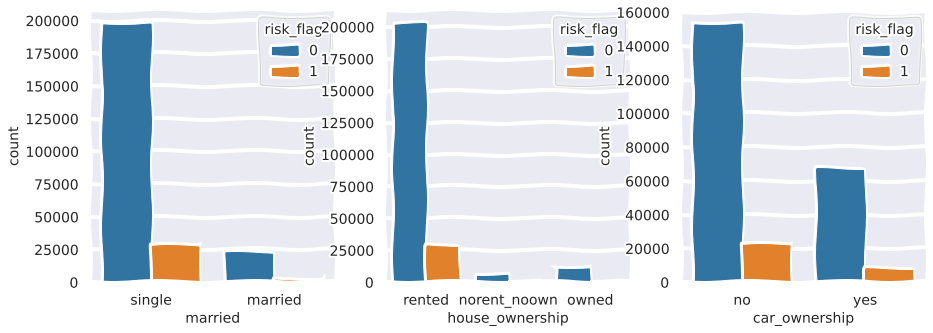

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(ax=axes[0], x=train_df.married, hue=labels)
sns.countplot(ax=axes[1], x=train_df.house_ownership, hue=labels)
sns.countplot(ax=axes[2], x=train_df.car_ownership, hue=labels)
#sns.histplot(ax=axes[1, 0], x=train_df.profession, hue=labels)
#sns.histplot(ax=axes[1, 1], x=train_df.city, hue=labels)
#sns.histplot(ax=axes[1, 2], x=train_df.state, hue=labels)

In [37]:
train_df.risk_flag.value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

In [22]:
train_df.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [31]:
# rented people
len(train_df[(train_df.house_ownership == 'rented') & (train_df.risk_flag == 1)])

29121

In [38]:
#single people
len(train_df[(train_df.married == 'single') & (train_df.risk_flag == 1)])

28360

In [39]:
# intersection of single and rented
len(train_df[(train_df.house_ownership == 'rented') & (train_df.risk_flag == 1) & (train_df.married == 'single')])

26624

In [ ]:
len(train_df[(train_df.house_ownership == 'rented') & (train_df.risk_flag == 1) & (train_df.married == 'single')])

In [43]:
#Union xxxxx
union = 28360+29121 - 26624
print('All captured with 2 features ==> {0}\nTotal risk == 1 are {1}'.format( union, str(30996)))

All captured with 2 features ==> 30857
Total risk == 1 are 30996


Looks pretty good

In [44]:
sample_sub.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [47]:
for i, row in enumerate(test_df.iterrows()):
  if row[1].married == 'single' and row[1].house_ownership == 'rented':
    sample_sub.risk_flag.iloc[i] = 1
  else:
     sample_sub.risk_flag.iloc[i] = 0

sample_sub.head()

,id,risk_flag
0,1,1
1,2,1
2,3,1
3,4,0
4,5,1


In [48]:
sample_sub.to_csv('sub1fix.csv', index=False)